In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

1.https://www.projectpro.io/article/how-to-build-arima-model-in-python/544
    
2. https://wiki.loginom.ru/articles/arima.html   

ARIMA включает эти идеи в свой комбинированный подход авторегрессии и скользящего среднего для моделирования данных стационарных временных рядов. Этот подход определяет важность прошлых колебаний, включает общие тенденции и имеет дело со сглаживанием эффекта выбросов или временных аномальных изменений в данных. Таким образом, ARIMA идеально подходит для фиксации исторических тенденций, сезонности, случайности и других нестационарных явлений


In [2]:
df =pd.read_csv('WWWusage.csv')

In [3]:
df.head()

,Unnamed: 0,time,WWWusage
0,1,1,88
1,2,2,84
2,3,3,85
3,4,4,85
4,5,5,84


In [4]:
df = df.drop('Unnamed: 0', axis=1) 
df.rename(columns = {'WWWusage':'value'}, inplace=True)

<AxesSubplot:>

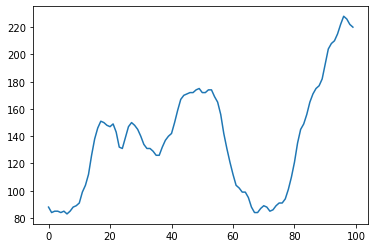

In [5]:
df.value.plot()

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

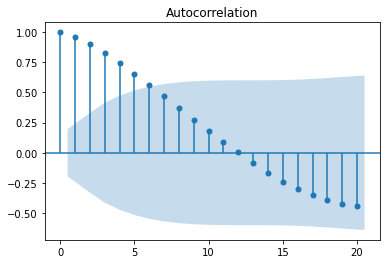

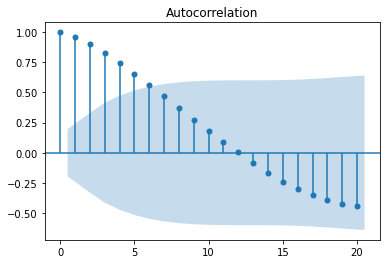

In [7]:
# Строим график автокорреляции (ACF), для определения корреляции в данных.
# Рассмотрим графики функции автокорреляции (ACF) и графики функции частичной автокорреляции (ACF),
# чтобы определить общую корреляцию в данных.  PACF отличается от ACF, тем, что исключено влияние соседних членов. 
plot_acf(df.value)

Данные не идеальны для модели ARIMA(есть зависимость корреляции от времени), чтобы непосредственно начать авторегрессионное обучение. Разностный сегмент ARIMA делает данные стационарными.

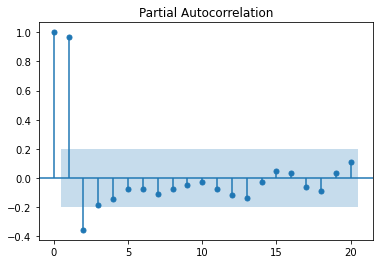

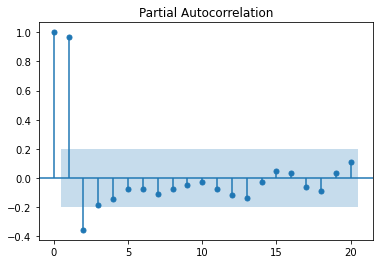

In [8]:
plot_pacf(df.value)

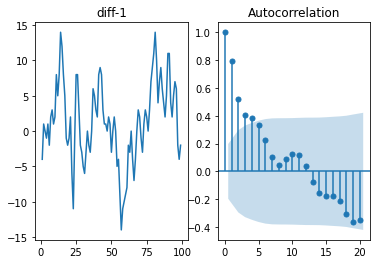

In [9]:
f= plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('diff-1')
ax1.plot(df.value.diff())
ax2 = f.add_subplot(122)
plot_acf(df.value.diff().dropna(), ax=ax2)
plt.show()

In [10]:
from statsmodels.tsa.stattools import acf # Смотрим на данные вне графиков.

In [12]:
df.acf= acf(df.value)
df.acf

array([ 1.        ,  0.96018011,  0.90113515,  0.82874638,  0.74598583,
        0.65724304,  0.56472186,  0.46856066,  0.37087797,  0.27417964,
        0.18085388,  0.09052872,  0.00213695, -0.08517373, -0.16705925,
       -0.23888993, -0.29903946, -0.34977533, -0.39272006, -0.42476725,
       -0.44285115, -0.44840287, -0.44318761, -0.43186762, -0.41746118,
       -0.39814979, -0.37211801, -0.34165176, -0.31040795, -0.28107658,
       -0.25190405, -0.22171229, -0.19048339, -0.15892139, -0.12789401,
       -0.0999955 , -0.07464708, -0.04986053, -0.02643312, -0.00452368,
        0.01304776])

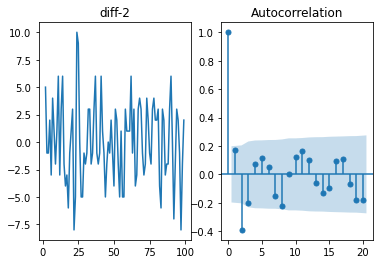

In [13]:
f= plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('diff-2')
ax1.plot(df.value.diff().diff())
ax2 = f.add_subplot(122)
plot_acf(df.value.diff().diff().dropna(), ax=ax2)
plt.show()

Из графика автокорреляции: если в совокупности автокорреляции или точки данных каждой задержки (по горизонтальной оси) положительны для нескольких последовательных задержек, может потребоваться дополнительное различие. И наоборот, если больше точек данных отрицательны, ряд является чрезмерным. Можно так же использовать математический тест, чтобы определить, какой порядок лучше всего подходит для рассматриваемых данных. Расширенный тест Дики-Фуллера — одна из таких мер, которую легко предоставляет statsmodel . Тест ADF направлен на отклонение нулевой гипотезы о том, что данные временного ряда нестационарны. Он вычисляет p-значение и сравнивает его с пороговым значением или уровнем значимости 0,05. Если p-значение меньше этого уровня, то данные стационарны; в противном случае порядок разности увеличивается на единицу.

In [14]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df.value.dropna())
print('p-value', result[1])
result = adfuller(df.value.diff().dropna())
print('p-value', result[1])
result = adfuller(df.value.diff().diff().dropna())
print('p-value', result[1])

p-value 0.12441935447109442
p-value 0.07026846015272728
p-value 2.843428755547158e-17


После разности 2-го порядка p-значение падает ниже допустимого порога. Можно считать порядок разности («d») равным 2. Это хорошо соответствует линейному графику автокорреляции, показанному выше. Однако значение p для 1-го порядка намного ближе к порогу, поэтому, чтобы быть консервативным, мы будем считать «d» равным 1 и посмотрим, как работает модель.

Далее, вычисление «p» или порядка для авторегрессионной модели. Проверяем график частичной автокорреляции(PACF), который измеряет корреляцию между данными временного ряда и определенным запаздыванием. По наличию или отсутствию корреляции можно определить, нужен ли лаг или порядок или нет.

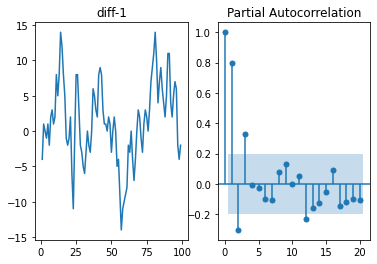

In [15]:
f= plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('diff-1')
ax1.plot(df.value.diff())
ax2 = f.add_subplot(122)
plot_pacf(df.value.diff().dropna(), ax=ax2)
plt.show()

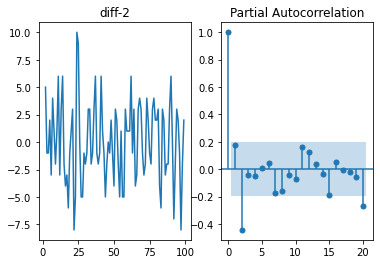

In [16]:
f= plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('diff-2')
ax1.plot(df.value.diff().diff())
ax2 = f.add_subplot(122)
plot_pacf(df.value.diff().diff().dropna(), ax=ax2)
plt.show()

На обоих графиках 1-й лаг является наиболее значительным. Таким образом, считаем, что «p» равно 1.

Далее, «q» можно оценить аналогичным образом, взглянув на график ACF вместо графика PACF. Глядя на количество лагов, пересекающих порог, мы можем определить, какая часть прошлого будет достаточно значимой, чтобы учитывать ее в будущем. Те, у кого высокая корреляция, вносят больший вклад, и этого будет достаточно для прогнозирования будущих значений. На графиках выше параметр скользящей средней (MA) может быть установлен равным 2.

Таким образом, окончательная модель ARIMA может быть определена как ARIMA(p=1, d=1,q= 2) .
